### HELP International is an international humanitarian NGO

### Objective :
- Cluster the countries by the factors mentioned in the CSV above and then present your solution and recommendations to the CEO
- 1 Perform PCA on the dataset and obtain the new dataset with the Principal Components. Choose the appropriate number of components k. You need to perform your clustering activity on this new dataset, i.e. the PCA modified dataset with the k components.
- 2 Try both K-means and Hierarchical clustering on this dataset and create clusters.
- 3 Analyse the clusters and identify the ones which are in dire need of aid. You can analyse the clusters by comparing how the original variables ( gdpp, child_mort, etc.) vary for each cluster of countries to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries. Note that you perform clustering on the PCA modified dataset and the clusters that are formed are being analysed now using the original variables to identify the countries which you finally want to select.
- 4 Also, you need to perform visualisations on the clusters that have been formed.  You can do this by choosing the first two Principal Components (on the X-Y axes) and plotting a scatter plot of all the countries and differentiating the clusters. You should also do the same visualisation using any two of the original variables (like gdpp, child_mort, etc.) on the X-Y axes as well. You can also choose other types of plots as well.
- 5 The final list of countries depends on the number of components that you choose and the number of clusters that you finally form. Also, both K-means and Hierarchical may give different results. Hence, there might be some subjectivity in the final number of countries that you think should be reported back to the CEO. Here, make sure that you report back at least 5 countries which are in direst need of aid from the analysis work that you perform.

In [107]:
#Import all the dependent libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### STEP 0 - Data Understanding & Cleaning 

In [108]:
#Load Data from CSV into a data frame
countries_df = pd.read_csv("country-data.csv")

#Inspect dataframe
countries_df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

##### Check the metadata of the dataframe

In [109]:
countries_df.shape

(167, 10)

In [110]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [111]:
countries_df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [112]:
countries_df.nunique()

country       167
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
life_expec    127
total_fer     138
gdpp          157
dtype: int64

In [113]:
countries_df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

##### Since below columns are percentage of Total GDP , it will be good to convert them to actual values 
- EXPORTS
- IMPORTS
- HEALTH

In [114]:
#Converting values to actual values 
countries_df['exports'] = countries_df['exports'] * countries_df['gdpp']/100
countries_df['imports'] = countries_df['imports'] * countries_df['gdpp']/100
countries_df['health']  = countries_df['health']  * countries_df['gdpp']/100

In [115]:
#Verify the data after conversion
countries_df.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

### 1. Principal Component Analysis

In [116]:
#First step is to remove the country column from the data frame to normalize the dataframe to have only continous variables
countries_df_pca = countries_df.drop(['country'], axis=1)

#Inspect the dataframe again 
countries_df_pca.head()

child_mort  exports    health   imports  income  inflation  life_expec  \
0        90.2    55.30   41.9174   248.297    1610       9.44        56.2   
1        16.6  1145.20  267.8950  1987.740    9930       4.49        76.3   
2        27.3  1712.64  185.9820  1400.440   12900      16.10        76.5   
3       119.0  2199.19  100.6050  1514.370    5900      22.40        60.1   
4        10.3  5551.00  735.6600  7185.800   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200

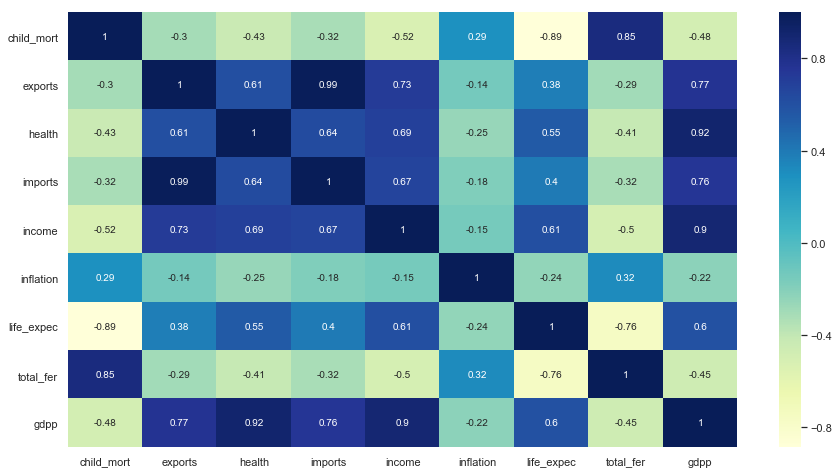

In [117]:
plt.figure(figsize = (15,8)) 
sns.heatmap(countries_df_pca.corr(), annot=True,cmap="YlGnBu")
plt.show()

#### Scaling is required to have all the continous variable in a range 

In [118]:
#Import the StandardScaler Library 
from sklearn.preprocessing import StandardScaler

standard_scaler  = StandardScaler()
countries_df_pca = standard_scaler.fit_transform(countries_df_pca)

In [119]:
#Inspect the data
countries_df_pca

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ..., 
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [120]:
#Importing the PCA module
from sklearn.decomposition import PCA

#Important to have random_state fixed ,otherwise we will get differnt result
pca = PCA(svd_solver='randomized', random_state=42)

In [121]:
#Performing the PCA
pca.fit(countries_df_pca)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [122]:
#List of PCA components.
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [123]:
#Let's check the variance ratios
pca.explained_variance_ratio_

array([  5.89372984e-01,   1.84451685e-01,   9.91147170e-02,
         6.07227801e-02,   3.02917253e-02,   2.45982702e-02,
         9.39743701e-03,   1.55641971e-03,   4.93981394e-04])

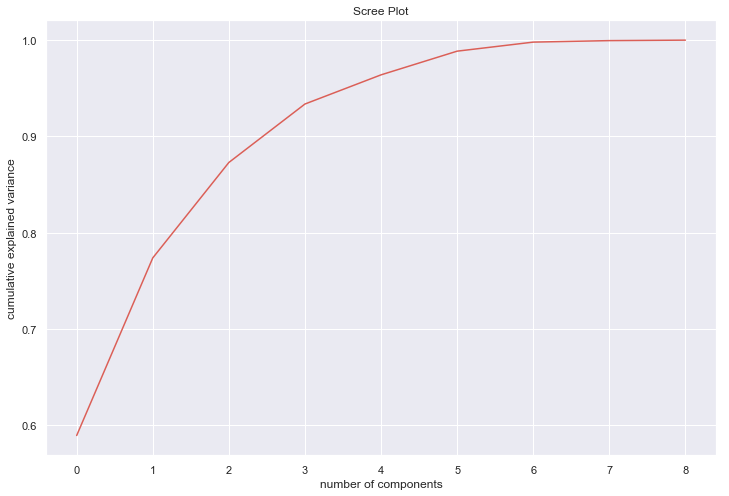

In [124]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Scree Plot')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [125]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.58937298,  0.77382467,  0.87293939,  0.93366217,  0.96395389,
        0.98855216,  0.9979496 ,  0.99950602,  1.        ])

INFO - Clearly 93% is been covered with 4 PCE component , I think this is a good start

In [126]:
#Understanding how the original features are loaded on the principal components. It can be verified from above as well.
colnames = list(list(countries_df.drop('country',axis=1).columns))
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3]})
pcs_df

Feature       PC1       PC2       PC3       PC4
0  child_mort -0.316392  0.476267 -0.150012 -0.148052
1     exports  0.342887  0.397311 -0.030574  0.449425
2      health  0.358535  0.155053 -0.075703 -0.599712
3     imports  0.344865  0.370781 -0.072174  0.461798
4      income  0.380041  0.128384  0.145764 -0.154806
5   inflation -0.143085  0.221261  0.948419 -0.007628
6  life_expec  0.343857 -0.369820  0.196752 -0.018395
7   total_fer -0.302842  0.459715 -0.077834 -0.213928
8        gdpp  0.399988  0.200624  0.010339 -0.364772

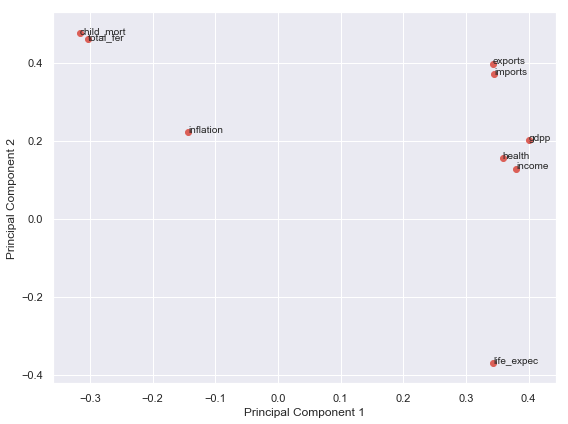

In [127]:
%matplotlib inline
fig = plt.figure(figsize = (8,6))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [128]:
#Finally let's go ahead and do dimenstionality reduction using the four Principal Components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [129]:
df_pca = pca_final.fit_transform(countries_df_pca)
df_pca.shape

(167, 4)

In [130]:
df_pca

array([[ -2.63664719e+00,   1.47208541e+00,  -5.46499687e-01,
          2.37267111e-01],
       [ -2.38453563e-02,  -1.43581581e+00,  -9.07965149e-03,
         -4.42921246e-01],
       [ -4.59260048e-01,  -6.78793979e-01,   9.67851701e-01,
         -1.76389183e-01],
       [ -2.72358099e+00,   2.17601815e+00,   5.97793905e-01,
          4.38918801e-01],
       [  6.48777079e-01,  -1.02649806e+00,  -2.44170307e-01,
         -2.67513413e-01],
       [  3.64467926e-02,  -6.84622218e-01,   1.46536060e+00,
          6.60677268e-02],
       [ -3.34274149e-01,  -1.27903261e+00,   1.90771929e-01,
         -5.01435384e-01],
       [  3.18436150e+00,  -2.38373184e-01,  -1.68539991e-01,
          1.66969553e+00],
       [  3.81813720e+00,   2.62613732e-01,  -2.97336122e-01,
          9.74405166e-01],
       [ -4.67475427e-01,  -4.94060580e-01,   6.08605487e-01,
         -2.58516905e-01],
       [  1.49957973e+00,  -4.25884552e-01,  -5.57799928e-01,
          2.24968322e-01],
       [  1.47129299e

In [131]:
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(df_pca)

In [132]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3]})

In [133]:
pcs_df2.head()

PC1       PC2       PC3       PC4
0 -2.636647  1.472085 -0.546500  0.237267
1 -0.023845 -1.435816 -0.009080 -0.442921
2 -0.459260 -0.678794  0.967852 -0.176389
3 -2.723581  2.176018  0.597794  0.438919
4  0.648777 -1.026498 -0.244170 -0.267513

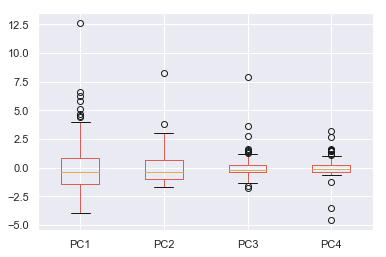

In [134]:
import matplotlib.pyplot as plt


pcs_df2.plot(kind='box')

In [135]:
pcs_df2.columns

Index(['PC1', 'PC2', 'PC3', 'PC4'], dtype='object')

#### Generic Functions 

In [136]:
def draw_univariate_plot(df):
 sns.set(style="darkgrid")   
 sns.set_palette(sns.color_palette("hls",20))
 
 for cols in df.columns:
        fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[cols],ax=ax[0])
        ax[1].set_title("Box Plot")
        sns.boxplot(data =df, x=cols,ax=ax[1],orient='v')
        plt.xticks(rotation='vertical',fontsize=12)
        plt.show()

In [137]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    print("Total Outlier removed are",len(df[((df < (Q1 - 1.5*IQR)) | (df > (Q3 + 1.5*IQR))).any(axis=1)]))
    df_out = df[((df >= (Q1 - 1.5*IQR)) & (df <= (Q3 + 1.5*IQR))).all(axis=1)]
    return df_out

In [212]:
def draw_countplots(col1,col2):
    ax = sns.barplot(x=col1, y=col2)
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., np.nan_to_num(p.get_height()), '%d' % int(np.nan_to_num(p.get_height())), 
        fontsize=12, color='black', ha='center', va='bottom')
        plt.xticks(rotation='vertical',fontsize=12)
    plt.show()

#### Outlier Analysis

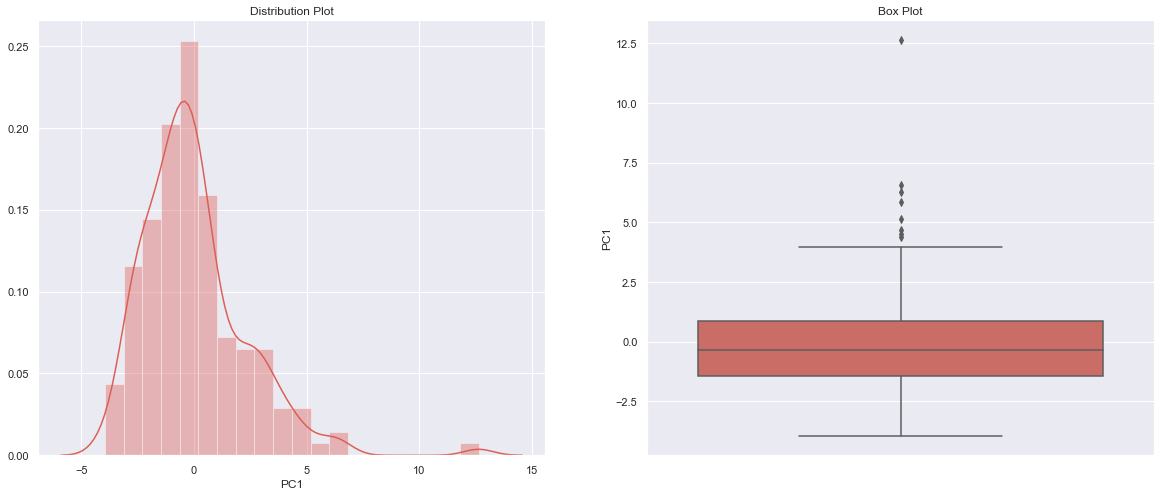

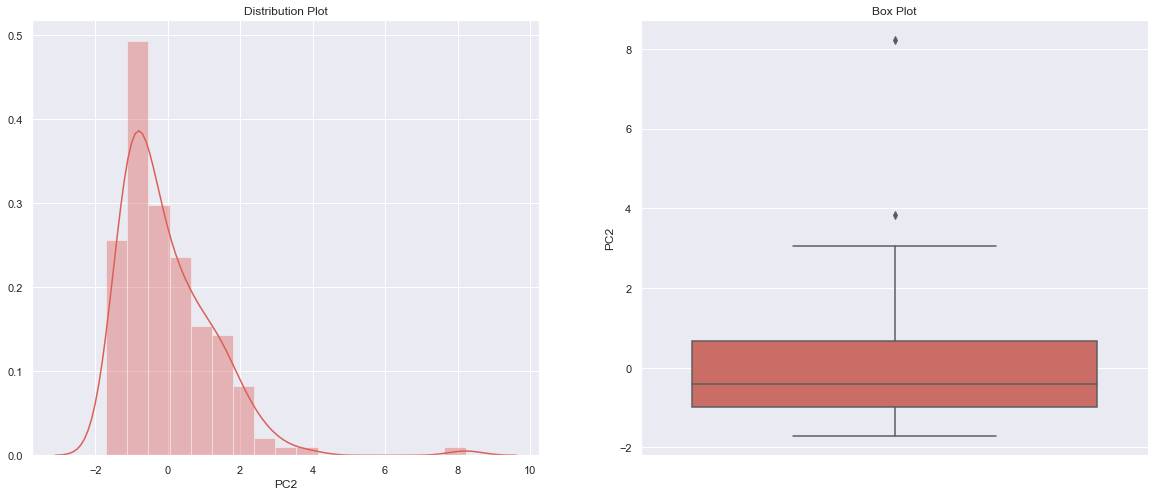

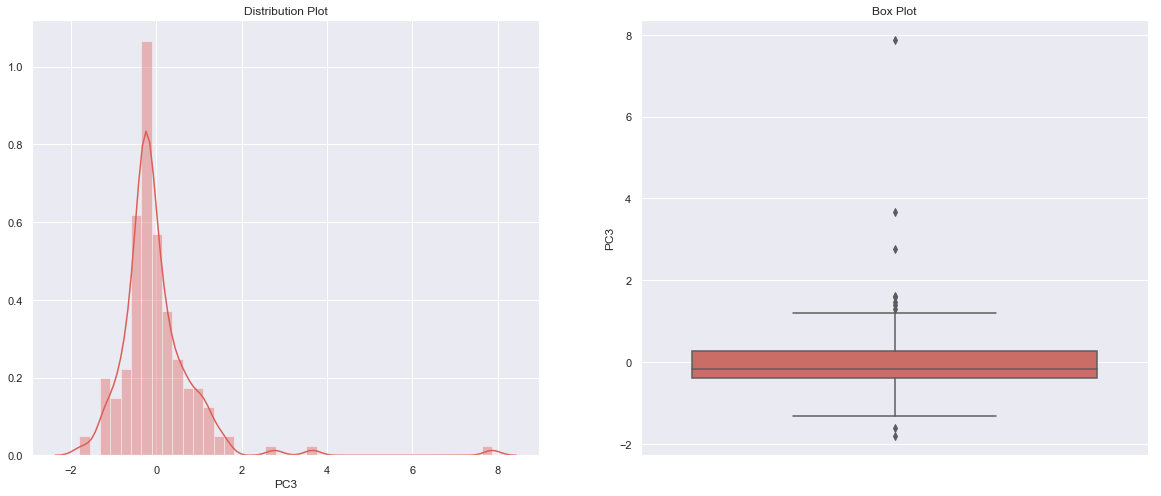

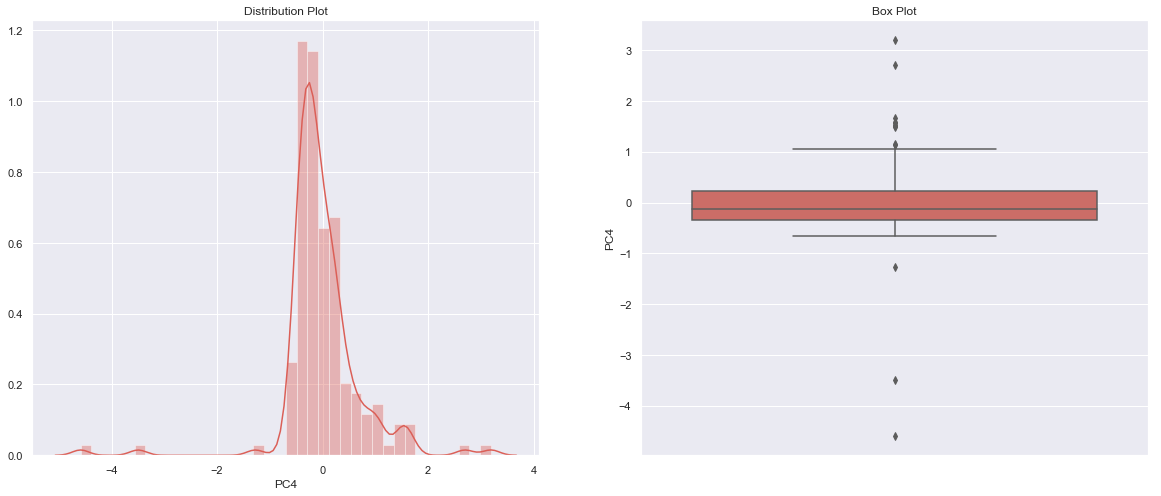

In [139]:
#Draw box plot for the data frame
draw_univariate_plot(pcs_df2)

In [140]:
#Remove the outlier based on the Quartile ranges
pcs_df3=remove_outliers(pcs_df2)

Total Outlier removed are 26


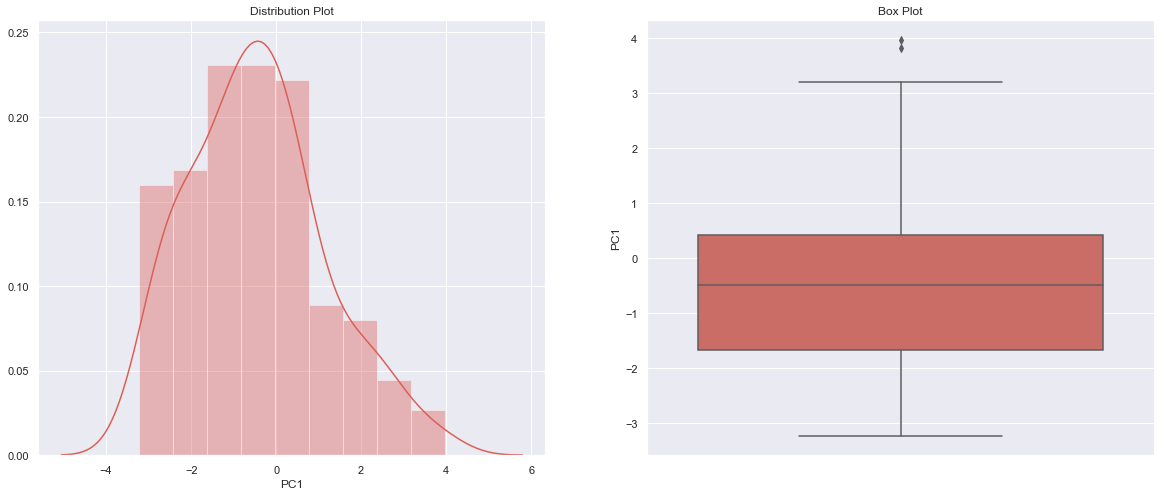

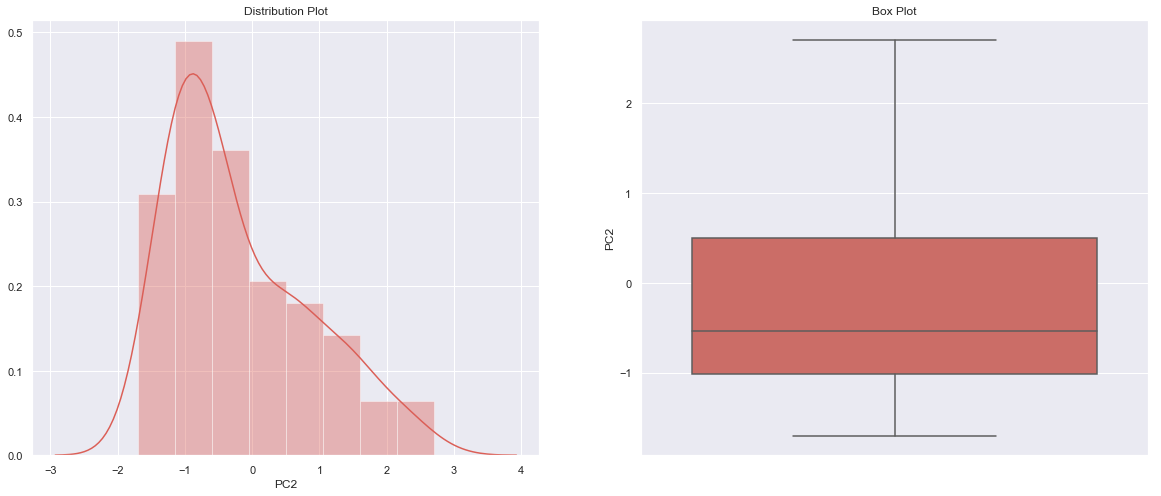

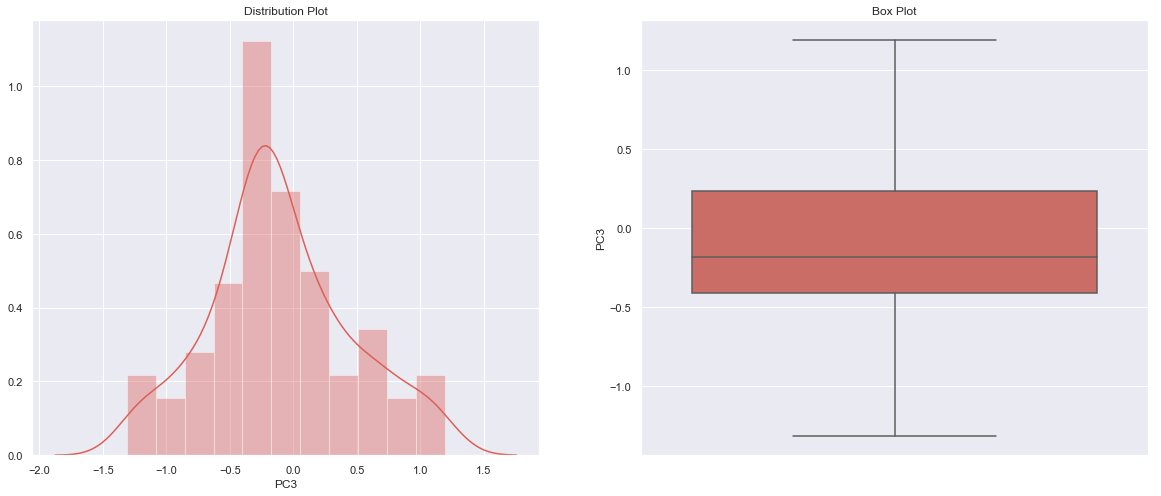

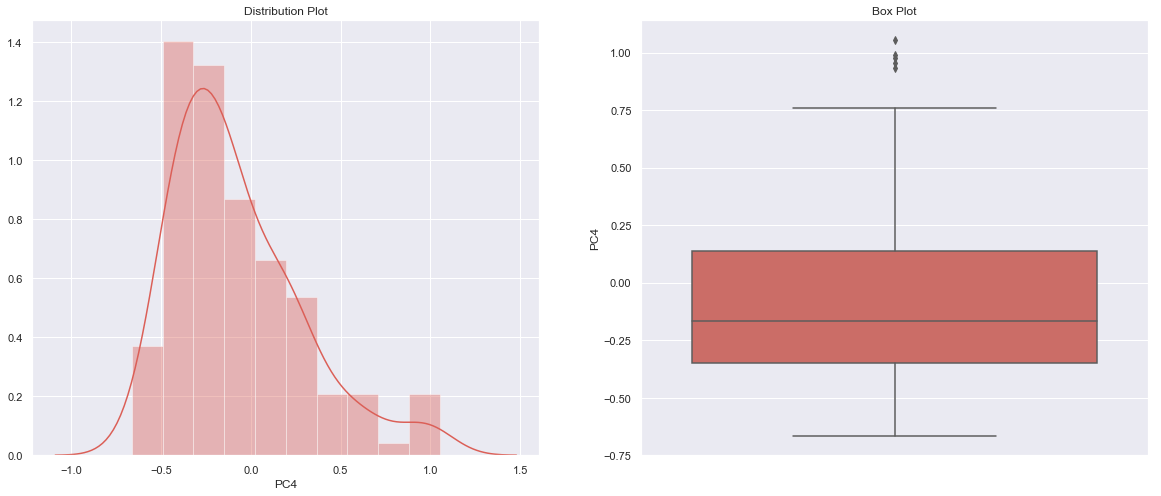

In [141]:
#Again try to draw plot and check for the outliers
draw_univariate_plot(pcs_df3)

In [142]:
#Inspect the size of the dataframe 
pcs_df3.shape

(141, 4)

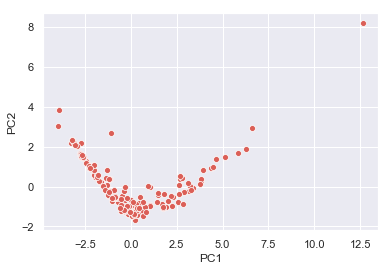

In [143]:
#Visualising the points on the PCs.
# one of the prime advatanges of PCA is that you can visualise high dimensional data
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)

In [144]:
countries_kmean_df = pcs_df3

### Clustering
- K Mean Clustering
- Hierarchial Clustering

In [145]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [146]:
#Let's check the Hopkins measure
hopkins(pcs_df2)

0.84374063146978462

#### K- means Clustering

In [147]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score

# To perform KMeans clustering 
from sklearn.cluster import KMeans
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(pcs_df2)
    sse_.append([k, silhouette_score(pcs_df2, kmeans.labels_)])

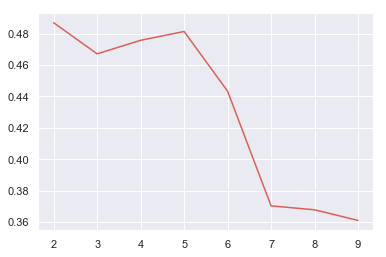

In [148]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

##### Sum of Squared Distances

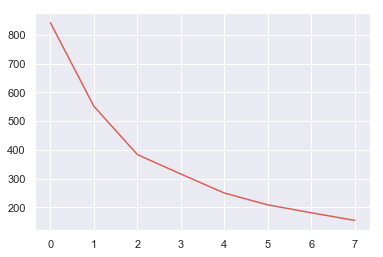

In [149]:
# sum of squared distances
ssd = []
for num_clusters in list(range(2,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(pcs_df2)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [150]:
### Starting analysis with K=5

In [151]:
#Here also we're seeing a distinct bend at around 4 clusters. Hence it seems a good K to choose.
#Let's perform K means using K=4
model_clus = KMeans(n_clusters = 5, max_iter=50,random_state = 50)
model_clus.fit(pcs_df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [152]:
model_clus.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0,
       2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 2, 0,
       0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0, 1, 0, 2,
       0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1, 1, 0, 0, 3,
       0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 2, 1, 4, 2,
       0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2, 0, 2, 1, 1,
       0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2, 2, 0,
       0, 0, 0, 0, 1, 1], dtype=int32)

In [153]:
countries_df2=pcs_df2
countries_df2.index = pd.RangeIndex(len(countries_df2.index))
countries_km = pd.concat([countries_df2, pd.Series(model_clus.labels_)], axis=1)
countries_km.columns = ['PC1', 'PC2', 'PC3','PC4','ClusterID']
countries_km.head()

PC1       PC2       PC3       PC4  ClusterID
0 -2.636647  1.472085 -0.546500  0.237267          1
1 -0.023845 -1.435816 -0.009080 -0.442921          0
2 -0.459260 -0.678794  0.967852 -0.176389          0
3 -2.723581  2.176018  0.597794  0.438919          1
4  0.648777 -1.026498 -0.244170 -0.267513          0

In [154]:
countries_km['ClusterID'].value_counts()

0    88
1    47
2    30
4     1
3     1
Name: ClusterID, dtype: int64

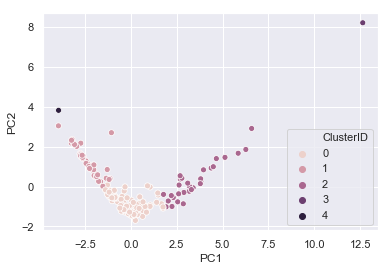

In [155]:
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=countries_km)

#### lets start with k =4 now

In [156]:
#Here also we're seeing a distinct bend at around 4 clusters. Hence it seems a good K to choose.
#Let's perform K means using K=4
model_clus = KMeans(n_clusters = 4, max_iter=50,random_state = 50)
model_clus.fit(pcs_df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [157]:
model_clus.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0,
       1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0, 1, 0,
       0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0, 2, 0, 1,
       0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2, 2, 0, 0, 3,
       0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 1, 2, 2, 1,
       0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0, 2, 3, 0, 1, 2, 2,
       0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 2, 2], dtype=int32)

In [158]:
countries_df2=pcs_df2
countries_df2.index = pd.RangeIndex(len(countries_df2.index))
countries_km = pd.concat([countries_df2, pd.Series(model_clus.labels_)], axis=1)
countries_km.columns = ['PC1', 'PC2', 'PC3','PC4','ClusterID']
countries_km.head()

PC1       PC2       PC3       PC4  ClusterID
0 -2.636647  1.472085 -0.546500  0.237267          2
1 -0.023845 -1.435816 -0.009080 -0.442921          0
2 -0.459260 -0.678794  0.967852 -0.176389          0
3 -2.723581  2.176018  0.597794  0.438919          2
4  0.648777 -1.026498 -0.244170 -0.267513          0

In [159]:
countries_km['ClusterID'].value_counts()

0    87
2    48
1    30
3     2
Name: ClusterID, dtype: int64

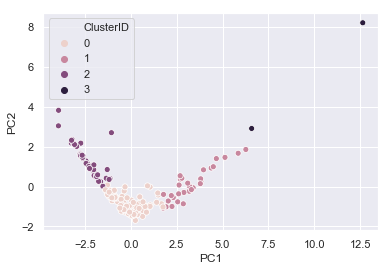

In [160]:
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=countries_km)

In [161]:
countries_df_final=pd.merge(countries_df,countries_km, left_index=True,right_index=True)
countries_df_final.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp       PC1       PC2       PC3  \
0       9.44        56.2       5.82    553 -2.636647  1.472085 -0.546500   
1       4.49        76.3       1.65   4090 -0.023845 -1.435816 -0.009080   
2      16.10        76.5       2.89   4460 -0.459260 -0.678794  0.967852   
3      22.40        60.1       6.16   3530 -2.723581  2.176018  0.597794   
4       1.44        76.8       2.13  12200  0.648777 -1.026498 -0.244170   

        PC4  ClusterID  
0  0.237267          2  
1 -0.442921          0  
2 -0.176389          0  
3  0.438919          2  
4 -0.267513          0

In [162]:
#countries_df_final=countries_df_final.drop(['PC1','PC2','PC3','PC4'],axis=1)
#countries_df_final.head()

#### Analysis on the Clusters

In [163]:
cntry_child_mort = 	pd.DataFrame(countries_df_final.groupby(["ClusterID"]).child_mort.mean())
cntry_exports= 	pd.DataFrame(countries_df_final.groupby(["ClusterID"]).exports.mean())
cntry_health = 	pd.DataFrame(countries_df_final.groupby(["ClusterID"]).health.mean())
cntry_imports = pd.DataFrame(countries_df_final.groupby(["ClusterID"]).imports.mean())
cntry_income = pd.DataFrame(countries_df_final.groupby(["ClusterID"]).income.mean())
cntry_inflation = pd.DataFrame(countries_df_final.groupby(["ClusterID"]).inflation.mean())
cntry_life_expec = pd.DataFrame(countries_df_final.groupby(["ClusterID"]).life_expec.mean())
cntry_total_fer = pd.DataFrame(countries_df_final.groupby(["ClusterID"]).total_fer.mean())
cntry_gdpp = pd.DataFrame(countries_df_final.groupby(["ClusterID"]).gdpp.mean())
cntry_PC1 = pd.DataFrame(countries_df_final.groupby(["ClusterID"]).PC1.mean())
cntry_PC2 = pd.DataFrame(countries_df_final.groupby(["ClusterID"]).PC2.mean())
cntry_PC3 = pd.DataFrame(countries_df_final.groupby(["ClusterID"]).PC3.mean())
cntry_PC4 = pd.DataFrame(countries_df_final.groupby(["ClusterID"]).PC4.mean())

In [164]:
cntry_truth = pd.concat([pd.Series([0,1,2,3]),cntry_child_mort,cntry_exports,cntry_health,cntry_imports,cntry_income,cntry_inflation,cntry_life_expec,cntry_total_fer,cntry_gdpp,cntry_PC1,cntry_PC2,cntry_PC3,cntry_PC4], axis=1)

In [165]:
cntry_truth.columns = ["ClusterID","cntry_child_mort","cntry_exports","cntry_health","cntry_imports","cntry_income","cntry_inflation","cntry_life_expec","cntry_total_fer","cntry_gdpp","cntry_PC1","cntry_PC2","cntry_PC3","cntry_PC4"]
cntry_truth

ClusterID  cntry_child_mort  cntry_exports  cntry_health  cntry_imports  \
0          0         21.113793    3328.149408    460.000120    3404.497944   
1          1          5.043333   21018.310000   4031.304333   17806.070000   
2          2         91.610417     879.063521    114.821765     827.028771   
3          3          2.800000  138475.000000   5001.930000  115092.000000   

   cntry_income  cntry_inflation  cntry_life_expec  cntry_total_fer  \
0  13297.586207         7.371506         73.147126         2.251954   
1  45180.000000         2.764533         80.383333         1.799667   
2   3897.354167        11.911146         59.239583         4.992083   
3  81900.000000         1.787000         82.000000         1.390000   

     cntry_gdpp  cntry_PC1  cntry_PC2  cntry_PC3  cntry_PC4  
0   7158.298851  -0.094498  -0.848012   0.141147  -0.288476  
1  43300.000000   3.278553   0.117747  -0.041798   0.856388  
2   1909.208333  -2.278155   1.231484  -0.213127   0.156028  
3  75800.000000   9.608064   5.566717  -0.397888  -4.041792

In [166]:
len(countries_df_final[countries_df_final['ClusterID']==2])

48

In [167]:
countries_df_final_dire=countries_df_final[countries_df_final['ClusterID']==2]

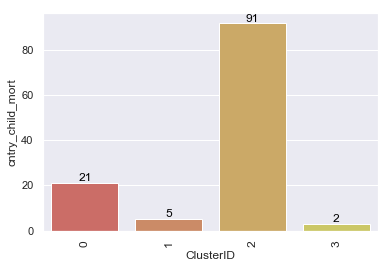

In [216]:
draw_countplots(cntry_truth.ClusterID,cntry_truth.cntry_child_mort)

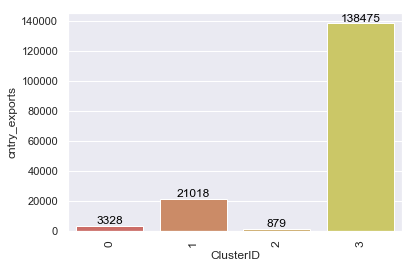

In [215]:
draw_countplots(cntry_truth.ClusterID,cntry_truth.cntry_exports)

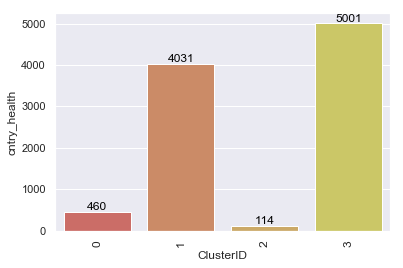

In [217]:
draw_countplots(cntry_truth.ClusterID,cntry_truth.cntry_health)

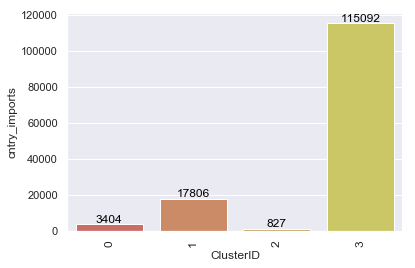

In [218]:
draw_countplots(cntry_truth.ClusterID,cntry_truth.cntry_imports)

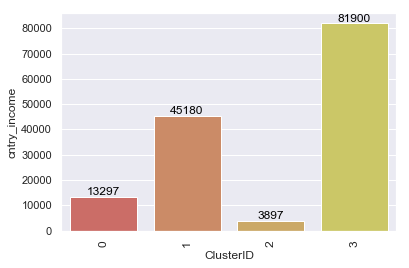

In [219]:
draw_countplots(cntry_truth.ClusterID,cntry_truth.cntry_income)

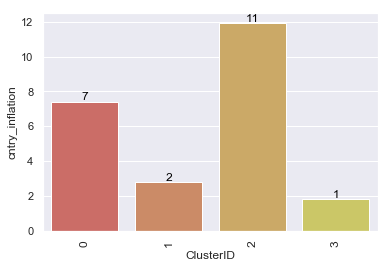

In [220]:
draw_countplots(cntry_truth.ClusterID,cntry_truth.cntry_inflation)

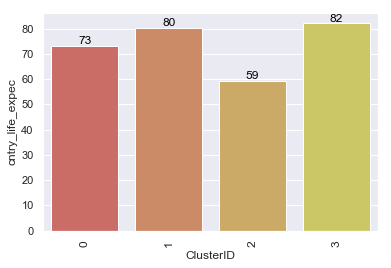

In [221]:
draw_countplots(cntry_truth.ClusterID,cntry_truth.cntry_life_expec)

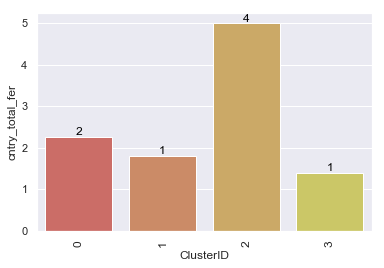

In [222]:
draw_countplots(cntry_truth.ClusterID,cntry_truth.cntry_total_fer)

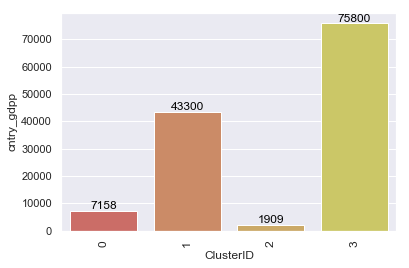

In [223]:
draw_countplots(cntry_truth.ClusterID,cntry_truth.cntry_gdpp)

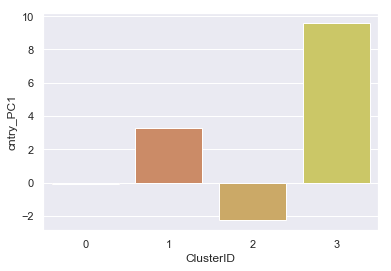

In [177]:
ax=sns.barplot(x=cntry_truth.ClusterID, y=cntry_truth.cntry_PC1)

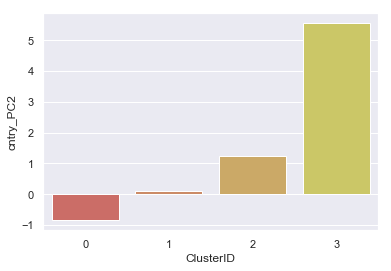

In [178]:
ax=sns.barplot(x=cntry_truth.ClusterID, y=cntry_truth.cntry_PC2)

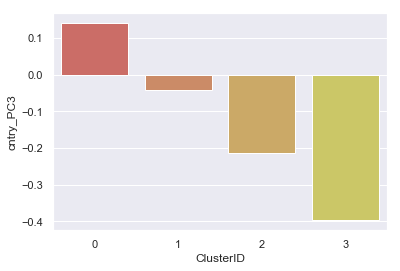

In [179]:
ax=sns.barplot(x=cntry_truth.ClusterID, y=cntry_truth.cntry_PC3)

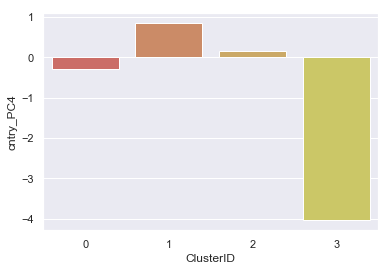

In [180]:
ax=sns.barplot(x=cntry_truth.ClusterID, y=cntry_truth.cntry_PC4)

#### Hierarchical Clusters

In [181]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

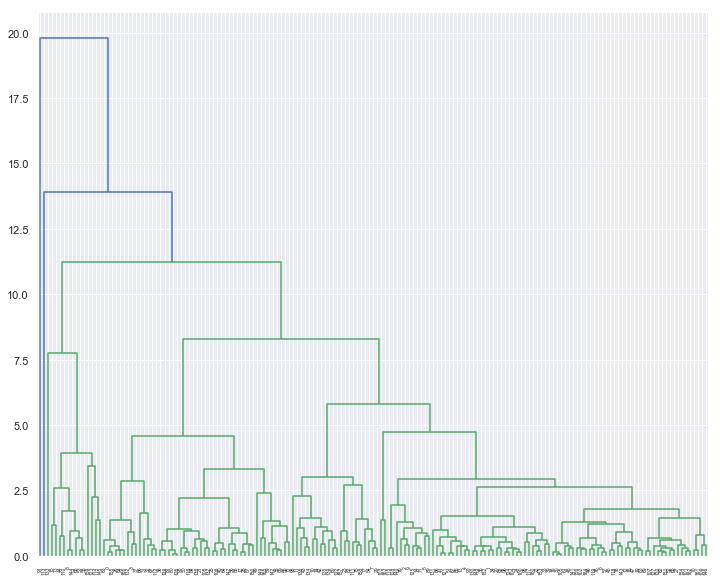

In [182]:
plt.figure(figsize=(12,10))
mergings = linkage(pcs_df2, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [183]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
clusterCut.shape

(167,)

In [184]:
countries_df_pre=countries_df_final.drop(['ClusterID'],axis=1)

In [185]:
#Add the cluster Id to the df
countries_df_hc = pd.concat([countries_df_pre, clusterCut.rename('ClusterID')], axis=1)

In [186]:
countries_df_hc

country  child_mort     exports     health  \
0                       Afghanistan        90.2     55.3000    41.9174   
1                           Albania        16.6   1145.2000   267.8950   
2                           Algeria        27.3   1712.6400   185.9820   
3                            Angola       119.0   2199.1900   100.6050   
4               Antigua and Barbuda        10.3   5551.0000   735.6600   
5                         Argentina        14.5   1946.7000   834.3000   
6                           Armenia        18.1    669.7600   141.6800   
7                         Australia         4.8  10276.2000  4530.8700   
8                           Austria         4.3  24059.7000  5159.0000   
9                        Azerbaijan        39.2   3171.1200   343.3920   
10                          Bahamas        13.8   9800.0000  2209.2000   
11                          Bahrain         8.6  14386.5000  1028.7900   
12                       Bangladesh        49.4    121.2800    26.6816   
13                         Barbados        14.2   6320.0000  1275.2000   
14                          Belarus         5.5   3099.4200   338.2830   
15                          Belgium         4.5  33921.6000  4750.8000   
16                           Belize        18.8   2525.8800   225.6800   
17                            Benin       111.0    180.4040    31.0780   
18                           Bhutan        42.7    926.5000   113.3600   
19                          Bolivia        46.6    815.7600    95.8320   
20           Bosnia and Herzegovina         6.9   1369.1700   511.7100   
21                         Botswana        52.5   2768.6000   527.0500   
22                           Brazil        19.8   1198.4000  1009.1200   
23                           Brunei        10.5  23792.2000  1002.5200   
24                         Bulgaria        10.8   3433.6800   469.9080   
25                     Burkina Faso       116.0    110.4000    38.7550   
26                          Burundi        93.6     20.6052    26.7960   
27                         Cambodia        44.4    425.2260    44.6448   
28                         Cameroon       108.0    290.8200    67.2030   
29                           Canada         5.6  13793.4000  5356.2000   
..                              ...         ...         ...        ...   
137                    South Africa        53.7   2082.0800   650.8320   
138                     South Korea         4.1  10917.4000  1531.5300   
139                           Spain         3.8   7828.5000  2928.7800   
140                       Sri Lanka        11.2    550.7600    82.6140   
141  St. Vincent and the Grenadines        20.7   1675.8700   278.4810   
142                           Sudan        76.7    291.5600    93.5360   
143                        Suriname        24.1   4357.5000   581.8300   
144                          Sweden         3.0  24070.2000  5017.2300   
145                     Switzerland         4.5  47744.0000  8579.0000   
146                      Tajikistan        52.4    109.9620    44.1324   
147                        Tanzania        71.9    131.2740    42.1902   
148                        Thailand        14.9   3378.2000   197.1040   
149                     Timor-Leste        62.6     79.2000   328.3200   
150                            Togo        90.3    196.1760    37.3320   
151                           Tonga        17.4    440.2000   179.9850   
152                         Tunisia        17.4   2090.7000   257.0940   
153                          Turkey        19.1   2182.8000   721.1800   
154                    Turkmenistan        62.0   3387.7200   111.0000   
155                          Uganda        81.0    101.7450    53.6095   
156                         Ukraine        11.7   1398.8700   229.2840   
157            United Arab Emirates         8.6  27195.0000  1281.0000   
158                  United Kingdom         5.2  10969.8000  3749.9600   
159                   United Sta

In [187]:
countries_df_hc[countries_df_hc['ClusterID']==0]

country  child_mort     exports     health  \
0                       Afghanistan        90.2     55.3000    41.9174   
1                           Albania        16.6   1145.2000   267.8950   
2                           Algeria        27.3   1712.6400   185.9820   
3                            Angola       119.0   2199.1900   100.6050   
4               Antigua and Barbuda        10.3   5551.0000   735.6600   
5                         Argentina        14.5   1946.7000   834.3000   
6                           Armenia        18.1    669.7600   141.6800   
7                         Australia         4.8  10276.2000  4530.8700   
9                        Azerbaijan        39.2   3171.1200   343.3920   
10                          Bahamas        13.8   9800.0000  2209.2000   
11                          Bahrain         8.6  14386.5000  1028.7900   
12                       Bangladesh        49.4    121.2800    26.6816   
13                         Barbados        14.2   6320.0000  1275.2000   
14                          Belarus         5.5   3099.4200   338.2830   
16                           Belize        18.8   2525.8800   225.6800   
17                            Benin       111.0    180.4040    31.0780   
18                           Bhutan        42.7    926.5000   113.3600   
19                          Bolivia        46.6    815.7600    95.8320   
20           Bosnia and Herzegovina         6.9   1369.1700   511.7100   
21                         Botswana        52.5   2768.6000   527.0500   
22                           Brazil        19.8   1198.4000  1009.1200   
23                           Brunei        10.5  23792.2000  1002.5200   
24                         Bulgaria        10.8   3433.6800   469.9080   
25                     Burkina Faso       116.0    110.4000    38.7550   
26                          Burundi        93.6     20.6052    26.7960   
27                         Cambodia        44.4    425.2260    44.6448   
28                         Cameroon       108.0    290.8200    67.2030   
29                           Canada         5.6  13793.4000  5356.2000   
30                       Cape Verde        26.5   1082.3700   135.3790   
31         Central African Republic       149.0     52.6280    17.7508   
..                              ...         ...         ...        ...   
134                 Slovak Republic         7.0  12665.8000  1459.1400   
135                        Slovenia         3.2  15046.2000  2201.9400   
136                 Solomon Islands        28.1    635.9700   110.2950   
137                    South Africa        53.7   2082.0800   650.8320   
138                     South Korea         4.1  10917.4000  1531.5300   
139                           Spain         3.8   7828.5000  2928.7800   
140                       Sri Lanka        11.2    550.7600    82.6140   
141  St. Vincent and the Grenadines        20.7   1675.8700   278.4810   
142                           Sudan        76.7    291.5600    93.5360   
143                        Suriname        24.1   4357.5000   581.8300   
146                      Tajikistan        52.4    109.9620    44.1324   
147                        Tanzania        71.9    131.2740    42.1902   
148                        Thailand        14.9   3378.2000   197.1040   
149                     Timor-Leste        62.6     79.2000   328.3200   
150                            Togo        90.3    196.1760    37.3320   
151                           Tonga        17.4    440.2000   179.9850   
152                         Tunisia        17.4   2090.7000   257.0940   
153                          Turkey        19.1   2182.8000   721.1800   
154                    Turkmenistan        62.0   3387.7200   111.0000   
155                          Uganda        81.0    101.7450    53.6095   
156                         Ukraine        11.7   1398.8700   229.2840   
157            United Arab Emirates         8.6  27195.0000  1281.0000   
158                  United King

In [188]:
countries_df_hc_dire =countries_df_hc[countries_df_hc['ClusterID']==0]

In [189]:
cntry_child_mort_hc = 	pd.DataFrame(countries_df_hc.groupby(["ClusterID"]).child_mort.mean())
cntry_exports_hc= 	pd.DataFrame(countries_df_hc.groupby(["ClusterID"]).exports.mean())
cntry_health_hc = 	pd.DataFrame(countries_df_hc.groupby(["ClusterID"]).health.mean())
cntry_imports_hc = pd.DataFrame(countries_df_hc.groupby(["ClusterID"]).imports.mean())
cntry_income_hc = pd.DataFrame(countries_df_hc.groupby(["ClusterID"]).income.mean())
cntry_inflation_hc = pd.DataFrame(countries_df_hc.groupby(["ClusterID"]).inflation.mean())
cntry_life_expec_hc = pd.DataFrame(countries_df_hc.groupby(["ClusterID"]).life_expec.mean())
cntry_total_fer_hc = pd.DataFrame(countries_df_hc.groupby(["ClusterID"]).total_fer.mean())
cntry_gdpp_hc = pd.DataFrame(countries_df_hc.groupby(["ClusterID"]).gdpp.mean())
cntry_PC1_hc = pd.DataFrame(countries_df_hc.groupby(["ClusterID"]).PC1.mean())
cntry_PC2_hc = pd.DataFrame(countries_df_hc.groupby(["ClusterID"]).PC2.mean())
cntry_PC3_hc = pd.DataFrame(countries_df_hc.groupby(["ClusterID"]).PC3.mean())
cntry_PC4_hc = pd.DataFrame(countries_df_hc.groupby(["ClusterID"]).PC4.mean())

In [190]:
cntry_truth_hc = pd.concat([pd.Series([0,1,2,3]),cntry_child_mort_hc,cntry_exports_hc,cntry_health_hc,cntry_imports_hc,cntry_income_hc,cntry_inflation_hc,cntry_life_expec_hc,cntry_total_fer_hc,cntry_gdpp_hc,cntry_PC1_hc,cntry_PC2_hc,cntry_PC3_hc,cntry_PC4_hc], axis=1)

In [191]:
cntry_truth_hc.columns = ["ClusterID","cntry_child_mort","cntry_exports","cntry_health","cntry_imports","cntry_income","cntry_inflation","cntry_life_expec","cntry_total_fer","cntry_gdpp","cntry_PC1","cntry_PC2","cntry_PC3","cntry_PC4"]
cntry_truth_hc

ClusterID  cntry_child_mort  cntry_exports  cntry_health  cntry_imports  \
0          0         41.040397    3799.012301    626.433272    3664.759484   
1          1          4.371429   34375.214286   5257.599286   28383.621429   
2          2          2.800000  183750.000000   8158.500000  149100.000000   
3          3        130.000000     589.490000    118.131000     405.420000   

   cntry_income  cntry_inflation  cntry_life_expec  cntry_total_fer  \
0  13381.543046         7.724199         69.617219         3.044834   
1  53264.285714         1.828000         80.628571         1.790714   
2  91700.000000         3.620000         81.300000         1.630000   
3   5150.000000       104.000000         60.500000         5.840000   

      cntry_gdpp  cntry_PC1  cntry_PC2  cntry_PC3  cntry_PC4  
0    8607.178808  -0.470534  -0.165036  -0.031329  -0.052410  
1   54142.857143   4.453448   0.919686  -0.183289   0.851779  
2  105000.000000  12.633634   8.219800  -0.571184  -4.587245  
3    2330.000000  -3.931333   3.825005   7.867898   0.576284

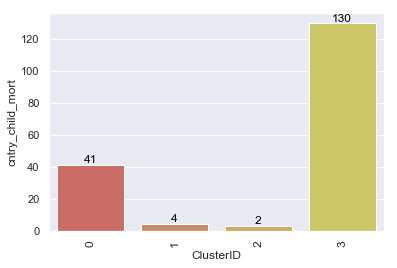

In [192]:
ax=sns.barplot(x=cntry_truth_hc.ClusterID, y=cntry_truth_hc.cntry_child_mort)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., np.nan_to_num(p.get_height()), '%d' % int(np.nan_to_num(p.get_height())), 
    fontsize=12, color='black', ha='center', va='bottom')
    plt.xticks(rotation='vertical',fontsize=12)
plt.show()

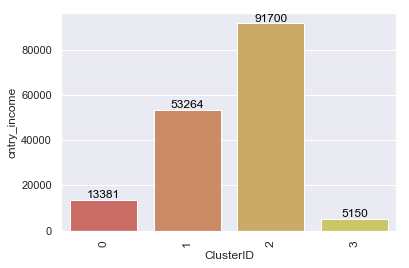

In [224]:
draw_countplots(cntry_truth_hc.ClusterID,cntry_truth_hc.cntry_income)

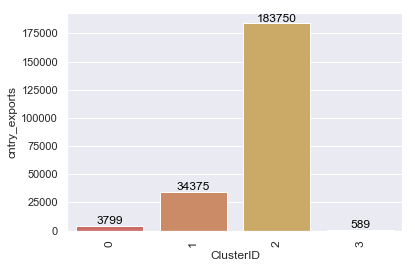

In [225]:
draw_countplots(cntry_truth_hc.ClusterID,cntry_truth_hc.cntry_exports)

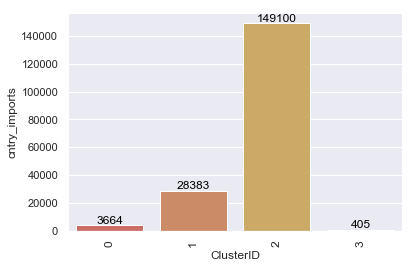

In [226]:
draw_countplots(cntry_truth_hc.ClusterID,cntry_truth_hc.cntry_imports)

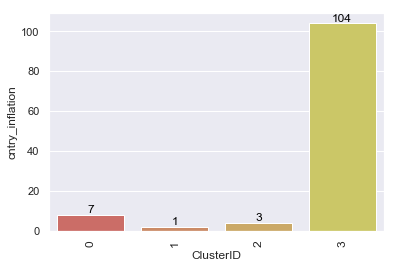

In [227]:
draw_countplots(cntry_truth_hc.ClusterID,cntry_truth_hc.cntry_inflation)

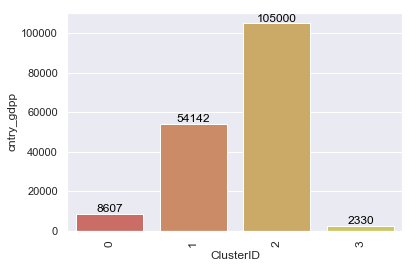

In [228]:
draw_countplots(cntry_truth_hc.ClusterID,cntry_truth_hc.cntry_gdpp)

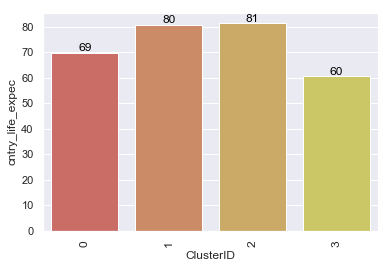

In [229]:
draw_countplots(cntry_truth_hc.ClusterID,cntry_truth_hc.cntry_life_expec)

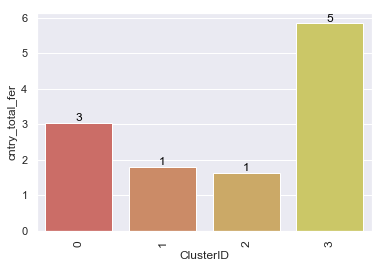

In [230]:
draw_countplots(cntry_truth_hc.ClusterID,cntry_truth_hc.cntry_total_fer)

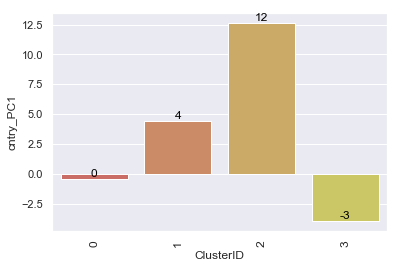

In [231]:
draw_countplots(cntry_truth_hc.ClusterID,cntry_truth_hc.cntry_PC1)

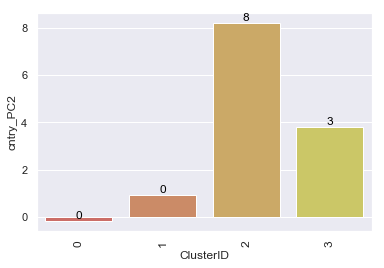

In [232]:
draw_countplots(cntry_truth_hc.ClusterID,cntry_truth_hc.cntry_PC2)

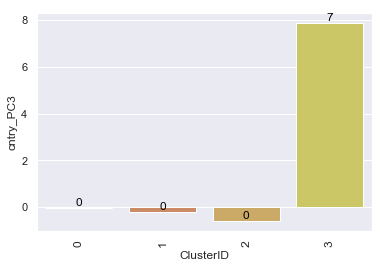

In [233]:
draw_countplots(cntry_truth_hc.ClusterID,cntry_truth_hc.cntry_PC3)

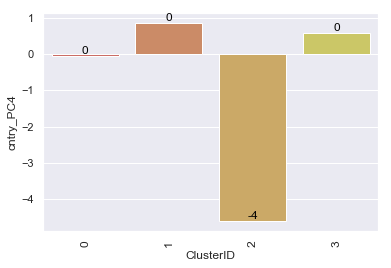

In [234]:
draw_countplots(cntry_truth_hc.ClusterID,cntry_truth_hc.cntry_PC4)

In [204]:
#Merging Cluster 0 and 3
countries_df_hc_dire=pd.concat([countries_df_hc[countries_df_hc['ClusterID']==3], countries_df_hc[countries_df_hc['ClusterID']==0]])

### Analysis Find the countries which are in dire need of aid 
- Filtered out CLuster two from the K mean 
- Filtered out Cluster Zero from the Heirarchial

### Analyszing the cluster 0 of K mean Cluster

In [205]:
countries_df_final_dire.describe()

child_mort       exports      health       imports        income  \
count   48.000000     48.000000   48.000000     48.000000     48.000000   
mean    91.610417    879.063521  114.821765    827.028771   3897.354167   
std     34.319855   2252.474004  165.518331   1540.981910   5590.168621   
min     28.100000     20.605200   12.821200     90.552000    609.000000   
25%     63.675000    102.873750   34.005875    193.319500   1390.000000   
50%     89.750000    196.260000   51.613500    339.306000   1860.000000   
75%    111.000000    552.522500   95.303250    801.000000   3522.500000   
max    208.000000  14671.800000  766.080000  10071.900000  33700.000000   

        inflation  life_expec  total_fer          gdpp        PC1        PC2  \
count   48.000000   48.000000  48.000000     48.000000  48.000000  48.000000   
mean    11.911146   59.239583   4.992083   1909.208333  -2.278155   1.231484   
std     15.362485    6.384914   1.036192   2925.911009   0.683792   0.821318   
min      0.885000   32.100000   2.590000    231.000000  -3.938184   0.012280   
25%      4.080000   56.725000   4.475000    551.500000  -2.715991   0.564290   
50%      8.855000   59.800000   5.055000    932.000000  -2.251605   1.085932   
75%     16.600000   62.825000   5.597500   1465.000000  -1.847454   1.618958   
max    104.000000   71.100000   7.490000  17100.000000  -1.053256   3.825005   

             PC3        PC4  ClusterID  
count  48.000000  48.000000       48.0  
mean   -0.213127   0.156028        2.0  
std     1.409755   0.207770        0.0  
min    -1.798863  -0.191079        2.0  
25%    -0.928432  -0.006701        2.0  
50%    -0.404625   0.143312        2.0  
75%     0.115110   0.259062        2.0  
max     7.867898   0.595813        2.0

In [206]:
countries_df_hc_dire.describe()

child_mort       exports       health       imports        income  \
count  152.000000    152.000000   152.000000    152.000000    152.000000   
mean    41.625658   3777.897023   623.089178   3643.316461  13327.388158   
std     40.761619   5536.243744   985.247002   4777.200395  13843.102551   
min      3.200000      1.076920    12.821200      0.651092    609.000000   
25%     10.750000    400.920000    67.353750    463.537500   3032.500000   
50%     23.700000   1431.855000   243.104000   1650.875000   9410.000000   
75%     62.925000   5049.712500   677.432500   5005.525000  18400.000000   
max    208.000000  32283.000000  5356.200000  32494.000000  80600.000000   

        inflation  life_expec   total_fer          gdpp         PC1  \
count  152.000000  152.000000  152.000000    152.000000  152.000000   
mean     8.357592   69.557237    3.063224   8565.881579   -0.493302   
std     10.884261    8.698136    1.537057  10959.678217    1.617503   
min     -4.210000   32.100000    1.230000    231.000000   -3.938184   
25%      2.077500   63.600000    1.855000   1305.000000   -1.740413   
50%      5.720000   71.450000    2.595000   4240.000000   -0.500994   
75%     11.725000   76.300000    4.287500  10900.000000    0.426857   
max    104.000000   82.800000    7.490000  51900.000000    3.397763   

              PC2         PC3         PC4   ClusterID  
count  152.000000  152.000000  152.000000  152.000000  
mean    -0.138786    0.020640   -0.048274    0.019737  
std      1.106931    0.981451    0.435574    0.243332  
min     -1.700660   -1.798863   -1.274364    0.000000  
25%     -0.997423   -0.402336   -0.347718    0.000000  
50%     -0.494817   -0.164440   -0.159753    0.000000  
75%      0.506398    0.276999    0.151387    0.000000  
max      3.825005    7.867898    1.669696    3.000000

#### Best way to get intersect of the two dataframe and shortlist the countries

In [207]:
dire_need_countries_df = pd.merge(countries_df_final_dire[['country']], countries_df_hc_dire, how='inner',on=['country'])

In [208]:
### List of countries dire need of AId are

In [209]:
dire_need_countries_df['country']

0                  Afghanistan
1                       Angola
2                        Benin
3                     Botswana
4                 Burkina Faso
5                      Burundi
6                     Cameroon
7     Central African Republic
8                         Chad
9                      Comoros
10            Congo, Dem. Rep.
11                 Congo, Rep.
12               Cote d'Ivoire
13           Equatorial Guinea
14                     Eritrea
15                       Gabon
16                      Gambia
17                       Ghana
18                      Guinea
19               Guinea-Bissau
20                       Haiti
21                        Iraq
22                       Kenya
23                    Kiribati
24                         Lao
25                     Lesotho
26                     Liberia
27                  Madagascar
28                      Malawi
29                        Mali
30                  Mauritania
31                  Mozambique
32      

### List of 5 Companies 

##### Basically the dataframe contains outliers data ,hence it will be better to find out which one needs the most based on three attributes
- Income
- Life Expectancy 
- GDPP

In [210]:
dire_need_countries_df.describe()

child_mort       exports      health       imports        income  \
count   48.000000     48.000000   48.000000     48.000000     48.000000   
mean    91.610417    879.063521  114.821765    827.028771   3897.354167   
std     34.319855   2252.474004  165.518331   1540.981910   5590.168621   
min     28.100000     20.605200   12.821200     90.552000    609.000000   
25%     63.675000    102.873750   34.005875    193.319500   1390.000000   
50%     89.750000    196.260000   51.613500    339.306000   1860.000000   
75%    111.000000    552.522500   95.303250    801.000000   3522.500000   
max    208.000000  14671.800000  766.080000  10071.900000  33700.000000   

        inflation  life_expec  total_fer          gdpp        PC1        PC2  \
count   48.000000   48.000000  48.000000     48.000000  48.000000  48.000000   
mean    11.911146   59.239583   4.992083   1909.208333  -2.278155   1.231484   
std     15.362485    6.384914   1.036192   2925.911009   0.683792   0.821318   
min      0.885000   32.100000   2.590000    231.000000  -3.938184   0.012280   
25%      4.080000   56.725000   4.475000    551.500000  -2.715991   0.564290   
50%      8.855000   59.800000   5.055000    932.000000  -2.251605   1.085932   
75%     16.600000   62.825000   5.597500   1465.000000  -1.847454   1.618958   
max    104.000000   71.100000   7.490000  17100.000000  -1.053256   3.825005   

             PC3        PC4  ClusterID  
count  48.000000  48.000000  48.000000  
mean   -0.213127   0.156028   0.062500  
std     1.409755   0.207770   0.433013  
min    -1.798863  -0.191079   0.000000  
25%    -0.928432  -0.006701   0.000000  
50%    -0.404625   0.143312   0.000000  
75%     0.115110   0.259062   0.000000  
max     7.867898   0.595813   3.000000

##### Here minimum is 
- Income - 609
- Life Excpectanct - 32.100000
- GDPP - 231

In [211]:
dire_need_countries_df.sort_values(['income','life_expec','gdpp']).head(5)

country  child_mort   exports   health  imports  income  \
10          Congo, Dem. Rep.       116.0  137.2740  26.4194  165.664     609   
26                   Liberia        89.3   62.4570  38.5860  302.802     700   
5                    Burundi        93.6   20.6052  26.7960   90.552     764   
33                     Niger       123.0   77.2560  17.9568  170.868     814   
7   Central African Republic       149.0   52.6280  17.7508  118.190     888   

    inflation  life_expec  total_fer  gdpp       PC1       PC2       PC3  \
10      20.80        57.5       6.54   334 -3.116056  2.172740  0.357523   
26       5.47        60.8       5.02   327 -2.258788  0.934273 -0.765320   
5       12.30        57.7       6.26   231 -2.763588  1.628834 -0.295656   
33       2.55        58.8       7.49   348 -3.062410  2.108832 -1.311093   
7        2.01        47.5       5.21   446 -3.238143  2.182754 -1.613568   

         PC4  ClusterID  
10  0.435244          0  
26  0.103324          0  
5   0.316531          0  
33  0.595813          0  
7   0.254538          0